# Sistem Pengontrol Suhu AC dengan Metode Fuzzy Tsukamoto

Notebook ini menggunakan metode Fuzzy Tsukamoto untuk menentukan **Suhu Optimal AC** berdasarkan tiga input:
- **Suhu Luar Ruangan** (10 - 40 °C)
- **Suhu Dalam Ruangan** (10 - 40 °C)
- **Jumlah Orang** (0 - 50 orang)

Output yang dihasilkan adalah **Suhu Optimal AC** dalam rentang 15 - 33 °C.

In [36]:
def turun(b,a,x):
    if x <= a:
        return 1
    elif a < x < b:
        return (b - x) / (b - a)
    else:
        return 0

def naik(b,a,x):
    if x <= a:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    else:
        return 1

def agregasi_turun(b,a,alfa):
    return b - (alfa * (b - a))

def agregasi_naik(b,a,alfa):
    return alfa * (b - a) + a

In [37]:
# Input dari user
suhu_luar = float(input("Masukkan Suhu Luar (°C): "))
suhu_dalam = float(input("Masukkan Suhu Dalam (°C): "))
jumlah_orang = int(input("Masukkan Jumlah Orang: "))

In [38]:
# Derajat keanggotaan untuk masing-masing input
suhu_luar_fuzzy = {
    'sejuk': turun(26, 18, suhu_luar),   # ubah batas agar 23 ada di tengah
    'normal': min(naik(22, 18, suhu_luar), turun(30, 22, suhu_luar)),  # range: 18–30
    'panas': naik(30, 24, suhu_luar)
}


suhu_dalam_fuzzy = {
    'dingin': turun(26, 18, suhu_dalam),
    'normal': min(naik(22, 18, suhu_dalam), turun(30, 22, suhu_dalam)),
    'hangat': naik(30, 24, suhu_dalam)
}


jumlah_orang_fuzzy = {
    'sedikit': turun(15, 0, jumlah_orang),
    'sedang': min(naik(30, 16, jumlah_orang), turun(30, 16, jumlah_orang)),
    'banyak': naik(50, 31, jumlah_orang)
}

In [39]:
# Output kategori dan range suhu optimal
kategori_output = {
    'dingin': (20, 15),
    'cukup_dingin': (23, 21),
    'normal': (26, 24),
    'cukup_hangat': (29, 27),
    'hangat': (33, 30)
}

In [40]:
# Aturan fuzzy (27 rules)
aturan = [
    ('sejuk', 'dingin', 'sedikit', 'cukup_dingin'),
    ('sejuk', 'dingin', 'sedang', 'normal'),
    ('sejuk', 'dingin', 'banyak', 'cukup_hangat'),
    ('sejuk', 'normal', 'sedikit', 'normal'),
    ('sejuk', 'normal', 'sedang', 'cukup_hangat'),
    ('sejuk', 'normal', 'banyak', 'hangat'),
    ('sejuk', 'hangat', 'sedikit', 'cukup_hangat'),
    ('sejuk', 'hangat', 'sedang', 'hangat'),
    ('sejuk', 'hangat', 'banyak', 'hangat'),
    ('normal', 'dingin', 'sedikit', 'normal'),
    ('normal', 'dingin', 'sedang', 'cukup_hangat'),
    ('normal', 'dingin', 'banyak', 'hangat'),
    ('normal', 'normal', 'sedikit', 'cukup_hangat'),
    ('normal', 'normal', 'sedang', 'hangat'),
    ('normal', 'normal', 'banyak', 'hangat'),
    ('normal', 'hangat', 'sedikit', 'hangat'),
    ('normal', 'hangat', 'sedang', 'hangat'),
    ('normal', 'hangat', 'banyak', 'hangat'),
    ('panas', 'dingin', 'sedikit', 'cukup_dingin'),
    ('panas', 'dingin', 'sedang', 'dingin'),
    ('panas', 'dingin', 'banyak', 'dingin'),
    ('panas', 'normal', 'sedikit', 'cukup_dingin'),
    ('panas', 'normal', 'sedang', 'dingin'),
    ('panas', 'normal', 'banyak', 'dingin'),
    ('panas', 'hangat', 'sedikit', 'dingin'),
    ('panas', 'hangat', 'sedang', 'dingin'),
    ('panas', 'hangat', 'banyak', 'dingin'),
]

In [ ]:
# Evaluasi aturan dan defuzzifikasi
z_list = []
alfa_list = []

for rule in aturan:
    sl, sd, jo, so = rule
    a = min(suhu_luar_fuzzy[sl], suhu_dalam_fuzzy[sd], jumlah_orang_fuzzy[jo])
    alfa_list.append(a)
    batas_atas, batas_bawah = kategori_output[so]
    z_val = agregasi_turun(batas_atas, batas_bawah, a) if so in ['dingin', 'cukup_dingin'] else agregasi_naik(batas_atas, batas_bawah, a)
    z_list.append(z_val)

# Defuzzifikasi akhir
if sum(alfa_list) != 0:
    suhu_optimal = sum(a*z for a, z in zip(alfa_list, z_list)) / sum(alfa_list)
else:
    suhu_optimal = 100

print("\nSuhu Luar Ruangan adalah: {:.2f}°C".format(suhu_luar))
print("\nSuhu Dalam Ruangan adalah: {:.2f}°C".format(suhu_dalam))
print(f"\nJumlah Orang adalah: {jumlah_orang} orang")
print("\nSuhu Optimal AC yang disarankan adalah: {:.2f}°C".format(suhu_optimal))


Suhu Luar Ruangan adalah: 25.00°C

Suhu Dalam Ruangan adalah: 15.00°C

Jumlah Orang yang adalah: °C

Suhu Optimal AC yang disarankan adalah: 24.44°C


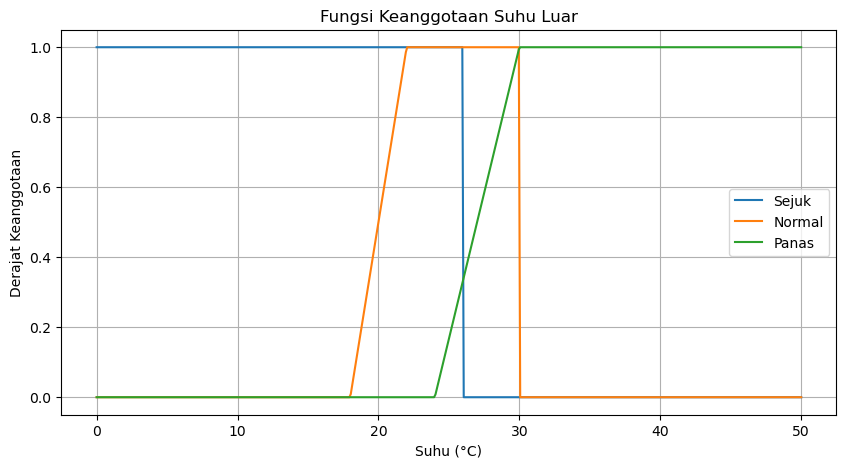

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan
def turun(a, b, x):
    return np.where(x <= a, 1,
           np.where(x >= b, 0,
           (b - x) / (b - a)))

def naik(a, b, x):
    return np.where(x <= a, 0,
           np.where(x >= b, 1,
           (x - a) / (b - a)))

# Data suhu
x = np.linspace(0, 50, 500)

# Fungsi keanggotaan suhu luar
sejuk = turun(26, 18, x)
normal = np.minimum(naik(18, 22, x), turun(30, 22, x))
panas = naik(24, 30, x)

# Plot grafik
plt.figure(figsize=(10, 5))
plt.plot(x, sejuk, label='Sejuk')
plt.plot(x, normal, label='Normal')
plt.plot(x, panas, label='Panas')
plt.title('Fungsi Keanggotaan Suhu Luar')
plt.xlabel('Suhu (°C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()


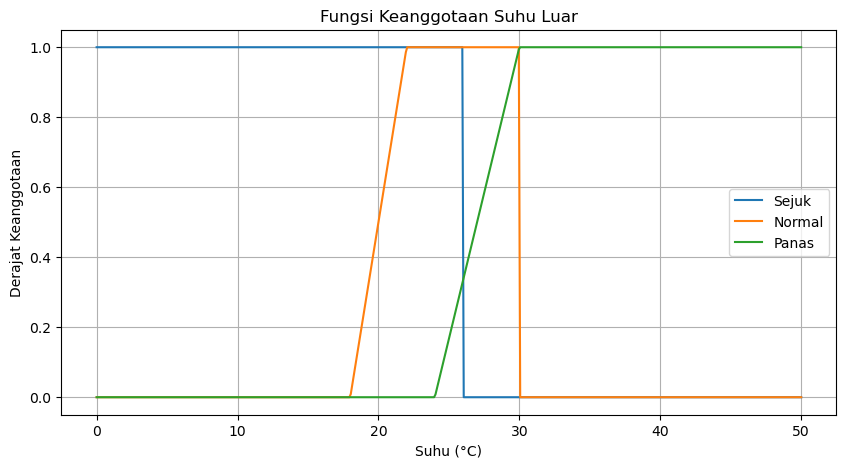

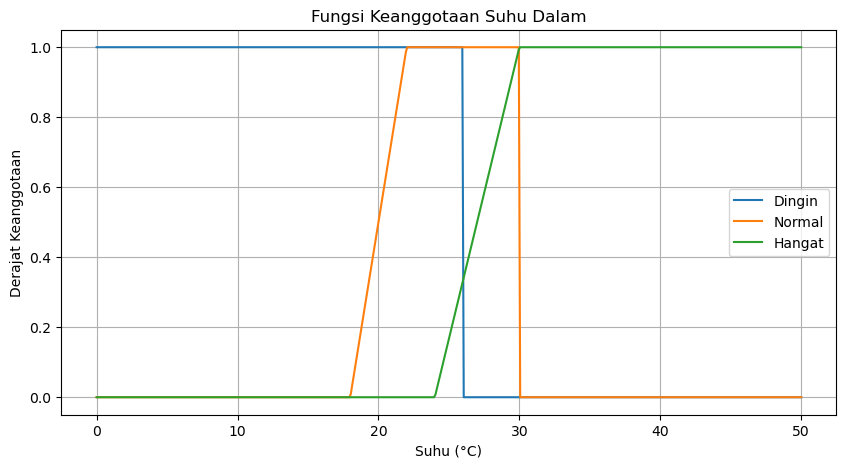

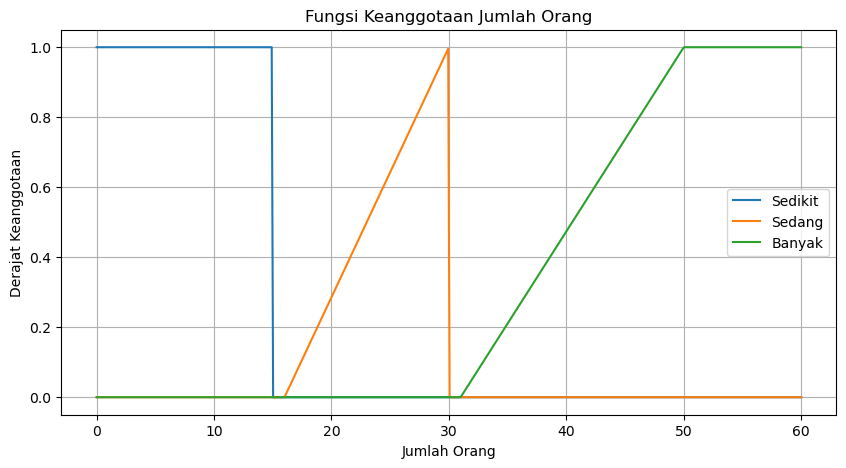

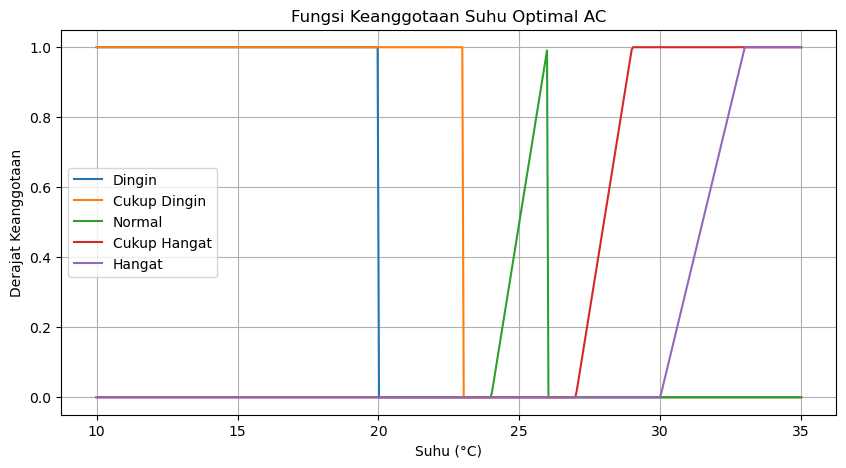

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan
def turun(a, b, x):
    return np.where(x <= a, 1,
           np.where(x >= b, 0,
           (b - x) / (b - a)))

def naik(a, b, x):
    return np.where(x <= a, 0,
           np.where(x >= b, 1,
           (x - a) / (b - a)))

# 1. Grafik Suhu Luar
x = np.linspace(0, 50, 500)
sejuk = turun(26, 18, x)
normal = np.minimum(naik(18, 22, x), turun(30, 22, x))
panas = naik(24, 30, x)

plt.figure(figsize=(10, 5))
plt.plot(x, sejuk, label='Sejuk')
plt.plot(x, normal, label='Normal')
plt.plot(x, panas, label='Panas')
plt.title('Fungsi Keanggotaan Suhu Luar')
plt.xlabel('Suhu (°C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()


# 2. Grafik Suhu Dalam
x = np.linspace(0, 50, 500)
dingin = turun(26, 18, x)
normal = np.minimum(naik(18, 22, x), turun(30, 22, x))
hangat = naik(24, 30, x)

plt.figure(figsize=(10, 5))
plt.plot(x, dingin, label='Dingin')
plt.plot(x, normal, label='Normal')
plt.plot(x, hangat, label='Hangat')
plt.title('Fungsi Keanggotaan Suhu Dalam')
plt.xlabel('Suhu (°C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()


# 3. Grafik Jumlah Orang
x = np.linspace(0, 60, 500)
sedikit = turun(15, 0, x)
sedang = np.minimum(naik(16, 30, x), turun(30, 16, x))
banyak = naik(31, 50, x)

plt.figure(figsize=(10, 5))
plt.plot(x, sedikit, label='Sedikit')
plt.plot(x, sedang, label='Sedang')
plt.plot(x, banyak, label='Banyak')
plt.title('Fungsi Keanggotaan Jumlah Orang')
plt.xlabel('Jumlah Orang')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()


# 4. Grafik Output: Suhu Optimal AC
x = np.linspace(10, 35, 500)
dingin = turun(20, 15, x)
cukup_dingin = turun(23, 21, x)
normal = np.minimum(naik(24, 26, x), turun(26, 24, x))  # Gauss/segitiga, disesuaikan dengan range
cukup_hangat = naik(27, 29, x)
hangat = naik(30, 33, x)

plt.figure(figsize=(10, 5))
plt.plot(x, dingin, label='Dingin')
plt.plot(x, cukup_dingin, label='Cukup Dingin')
plt.plot(x, normal, label='Normal')
plt.plot(x, cukup_hangat, label='Cukup Hangat')
plt.plot(x, hangat, label='Hangat')
plt.title('Fungsi Keanggotaan Suhu Optimal AC')
plt.xlabel('Suhu (°C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

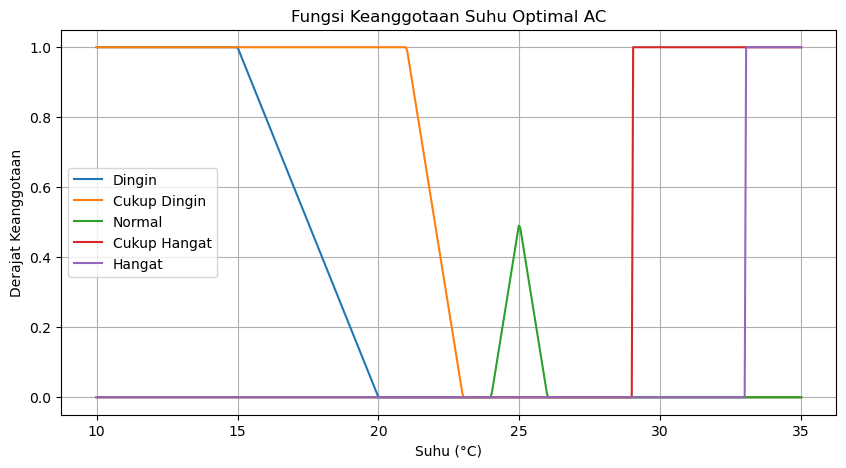

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan
def turun(a, b, x):
    return np.where(x <= b, 1,
           np.where(x >= a, 0,
           (a - x) / (a - b)))

def naik(a, b, x):
    return np.where(x <= a, 0,
           np.where(x >= b, 1,
           (x - a) / (b - a)))

# Data suhu output (suhu optimal)
x = np.linspace(10, 35, 500)

# Kategori output berdasarkan rentang pada sistem fuzzy
dingin = turun(20, 15, x)
cukup_dingin = turun(23, 21, x)
normal = np.minimum(naik(24, 26, x), turun(26, 24, x))
cukup_hangat = naik(29, 27, x)
hangat = naik(33, 30, x)

# Plot grafik
plt.figure(figsize=(10, 5))
plt.plot(x, dingin, label='Dingin')
plt.plot(x, cukup_dingin, label='Cukup Dingin')
plt.plot(x, normal, label='Normal')
plt.plot(x, cukup_hangat, label='Cukup Hangat')
plt.plot(x, hangat, label='Hangat')
plt.title('Fungsi Keanggotaan Suhu Optimal AC')
plt.xlabel('Suhu (°C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()
